# Mini Maze
### Group kamekazee
Rovick Anthony Pasamonte<br>
Zaj Kenneth Panes<br>
Maui Azryl Lomuntad<br>
Arvin Clark Lota

In [8]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import messagebox

### Helper functions for pathfinding algorithms

In [9]:
def get_neighbors(position, maze):
    row, col = position
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbors = []
    for dr, dc in directions:
        r, c = row + dr, col + dc
        if 0 <= r < len(maze) and 0 <= c < len(maze[0]) and maze[r][c] != 1:
            neighbors.append((r, c))
    return neighbors

def reconstruct_path(parents, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = parents[current]
    return path[::-1]  # Reverse the path to start from the beginning

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

### Breadth First Search

In [10]:
def bfs(maze, start, end):
    queue = deque([start])
    visited = set([start])
    parents = {start: None}

    while queue:
        current = queue.popleft()

        if current == end:
            return reconstruct_path(parents, start, end)

        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                queue.append(neighbor)
    return None

### Depth First Search

In [11]:
def dfs(maze, start, end):
    stack = [start]
    visited = set([start])
    parents = {start: None}

    while stack:
        current = stack.pop()

        if current == end:
            return reconstruct_path(parents, start, end)

        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                parents[neighbor] = current
                stack.append(neighbor)
    return None


### Heuristic A* Algorithms

In [12]:
def a_star(maze, start, end):
    open_list = []
    heapq.heappush(open_list, (0, start))
    g_cost = {start: 0}
    parents = {start: None}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == end:
            return reconstruct_path(parents, start, end)

        for neighbor in get_neighbors(current, maze):
            tentative_g_cost = g_cost[current] + 1 

            if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                g_cost[neighbor] = tentative_g_cost
                f_cost = tentative_g_cost + manhattan_distance(neighbor, end)
                heapq.heappush(open_list, (f_cost, neighbor))
                parents[neighbor] = current
    return None

### Visualization function using matplotlib

In [13]:
def visualize_maze(maze, path=None, start=None, end=None, title="Maze"):
    maze = np.array([[1 if cell == 1 else 0 for cell in row] for row in maze])
    plt.figure(figsize=(6, 6))
    plt.imshow(maze, cmap='binary', origin='upper')

    # Highlight start and end points
    if start:
        plt.plot(start[1], start[0], 'go', label="Start")  # Green for start
    if end:
        plt.plot(end[1], end[0], 'bo', label="End")  # Blue for end

    # Plot the path
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], marker='o', color='red', label="Path")  # Red for path

    plt.title(title)
    plt.grid(True)
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.legend()
    plt.show()

### GUI / Application

In [14]:
class PathfindingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Maze Pathfinding")

        self.rows_label = tk.Label(root, text="Rows:", font=("Arial", 12, "bold"))
        self.rows_label.grid(row=0, column=0)
        self.rows_entry = tk.Entry(root)
        self.rows_entry.grid(row=0, column=1)

        self.cols_label = tk.Label(root, text="Columns:", font=("Arial", 12, "bold"))
        self.cols_label.grid(row=1, column=0)
        self.cols_entry = tk.Entry(root)
        self.cols_entry.grid(row=1, column=1)

        self.generate_button = tk.Button(root, text="Generate Maze", command=self.generate_maze)
        self.generate_button.grid(row=2, column=0, columnspan=2)

        self.maze_label = tk.Label(root, text="Maze Layout (Editable):")
        self.maze_label.grid(row=3, column=0, columnspan=2)

        self.maze_text = tk.Text(root, height=10, width=30)
        self.maze_text.grid(row=4, column=0, columnspan=2)

        self.preview_button = tk.Button(root, text="Preview Maze", command=self.preview_maze)
        self.preview_button.grid(row=5, column=0, columnspan=2)

        self.algorithm_label = tk.Label(root, text="Algorithm:")
        self.algorithm_label.grid(row=7, column=0)
        self.algorithm_choice = tk.StringVar()
        self.algorithm_choice.set("BFS")
        self.algorithm_menu = tk.OptionMenu(root, self.algorithm_choice, "BFS", "DFS", "A*")
        self.algorithm_menu.grid(row=7, column=1)

        self.run_button = tk.Button(root, text="Run", command=self.run_algorithm)
        self.run_button.grid(row=8, column=0, columnspan=2)

    def generate_maze(self):
        try:
            rows = int(self.rows_entry.get())
            cols = int(self.cols_entry.get())
            if rows <= 0 or cols <= 0:
                raise ValueError("Rows and columns must be positive integers.")

            # Automatically generate a default maze with all 0s (open spaces)
            maze = [[0] * cols for _ in range(rows)]
            # Mark the start and end points
            maze[0][0] = "#"  # Start point
            maze[rows - 1][cols - 1] = "*"  # End point

            # Display the generated maze in the text area (editable)
            self.maze_text.delete("1.0", tk.END)
            for row in maze:
                self.maze_text.insert(tk.END, " ".join(map(str, row)) + "\n")
        except ValueError as e:
            messagebox.showerror("Input Error", str(e))

    def get_maze_from_input(self):
        try:
            rows = int(self.rows_entry.get())
            cols = int(self.cols_entry.get())
            maze = []

            maze_input = self.maze_text.get("1.0", tk.END).strip().split("\n")
            for line in maze_input:
                row = []
                for char in line.split():
                    if char == "#":
                        row.append(0)  # Treat start as open space (0)
                        start = (len(maze), len(row) - 1)
                    elif char == "*":
                        row.append(0)  # Treat end as open space (0)
                        end = (len(maze), len(row) - 1)
                    else:
                        row.append(int(char))
                if len(row) != cols:
                    raise ValueError(f"Each row must have {cols} columns.")
                maze.append(row)

            return maze, start, end
        except ValueError as e:
            messagebox.showerror("Input Error", str(e))
            return None, None, None

    def preview_maze(self):
        maze, start, end = self.get_maze_from_input()
        if maze is None:
            return
        visualize_maze(maze, start=start, end=end, title="Preview Maze")

    def run_algorithm(self):
        maze, start, end = self.get_maze_from_input()
        if maze is None:
            return

        algorithm = self.algorithm_choice.get()
        path = None

        if algorithm == "BFS":
            path = bfs(maze, start, end)
            algo_name = "BFS"
        elif algorithm == "DFS":
            path = dfs(maze, start, end)
            algo_name = "DFS"
        elif algorithm == "A*":
            path = a_star(maze, start, end)
            algo_name = "A*"

        if path:
            visualize_maze(maze, path=path, start=start, end=end, title=f"{algo_name} Path")
        else:
            messagebox.showinfo("Result", f"No path found using {algo_name}.")

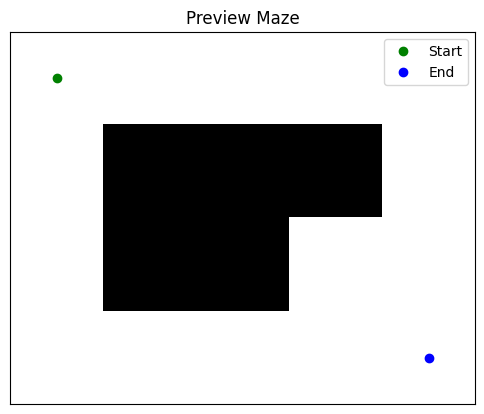

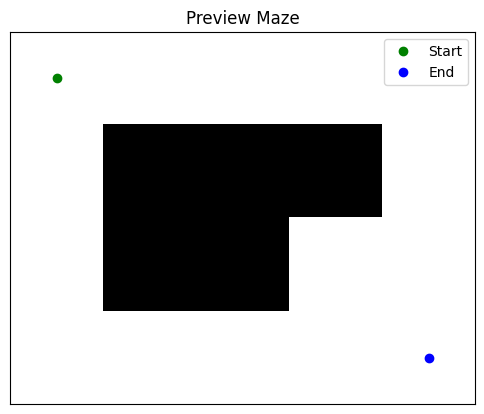

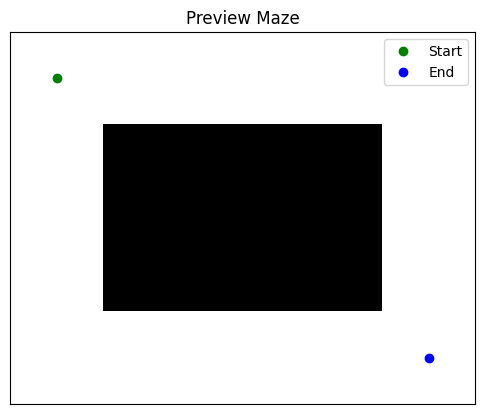

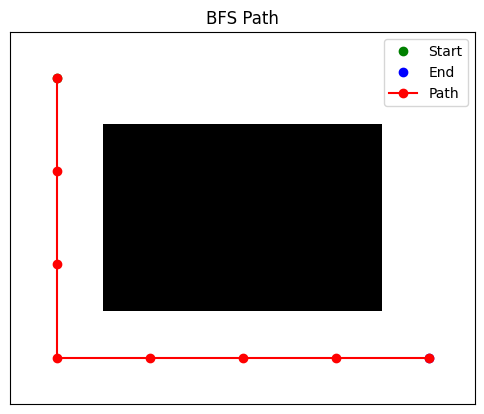

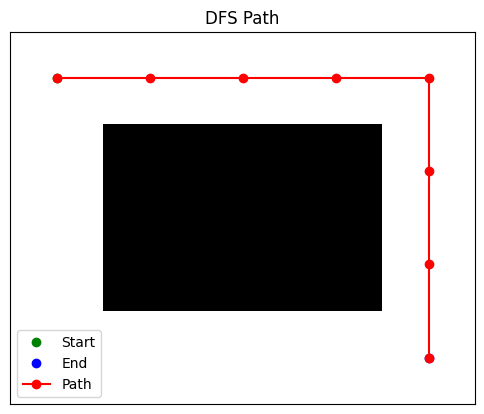

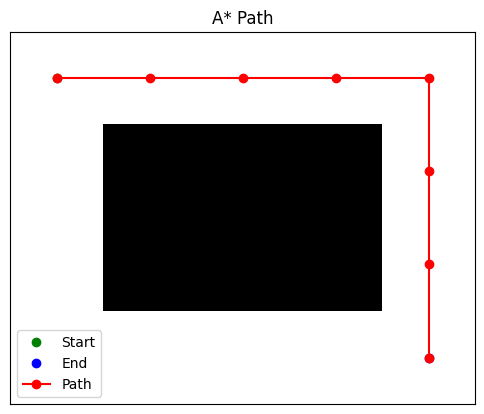

In [15]:
if __name__ == "__main__":
    root = tk.Tk()
    app = PathfindingApp(root)
    root.mainloop()